# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [27]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

In [5]:
f=100
a=60
o=40


p=a/f
q=o/f


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

Since a new fruit is replaced in the basket, the probability of picking apple or orange remains same. 
Independent event

In [ ]:
# What is the probability that the first 5 fruits are all apples?
probapple=p**5
probapple


0.07775999999999998

In [8]:
#What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?
probappleorange=(p**5)*(q**15)
probappleorange

8.349416423424006e-08

## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [14]:
# your solution here
import math 

n=20
k=5

total=math.comb(n, k)
total

15504

In [15]:
total*probappleorange

0.0012944935222876579

In [16]:
# your solution here
probanyorder=total*(p**k)*((1-p)**(n-k))
probanyorder

0.0012944935222876579

In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [19]:
sum=0
for k in range (0,5):
    a=math.comb(n, k)*(p**k)*((1-p)**(n-k))
    sum+=a
print(sum)

0.00031703112116863


In [ ]:
prob_lessthan5=sum(math.comb(n,k)*(p**k)((1-p)**(n-k)) for k in range(0,5))

<!-- **Plot the PDF (probability distributiom function) for the above binomial distribution.** -->

**Plot the Probability Mass Function (PMF) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [43]:
#PMF vs CDF#

#parameters
n=20
p=0.6
k_values = list(range(n + 1))
pmf_values=[math.comb(n,k)*(p**k)*((1-p)**(n-k)) for k in k_values]

cdf_values=[]
sum=0
for i in pmf_values:
    sum+=i
    cdf_values.append(sum)




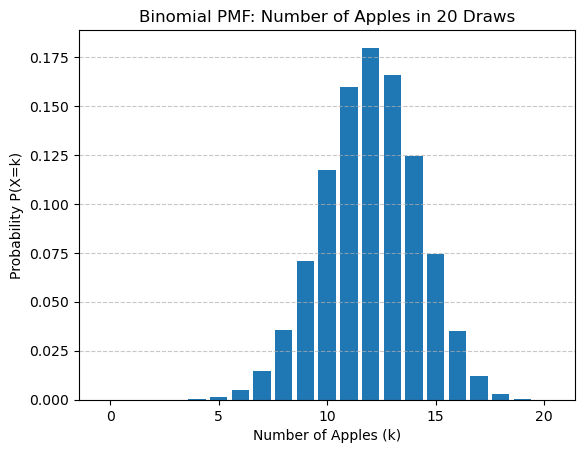

In [44]:
plt.bar(k_values, pmf_values)
plt.title("Binomial PMF: Number of Apples in 20 Draws")
plt.xlabel("Number of Apples (k)")
plt.ylabel("Probability P(X=k)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


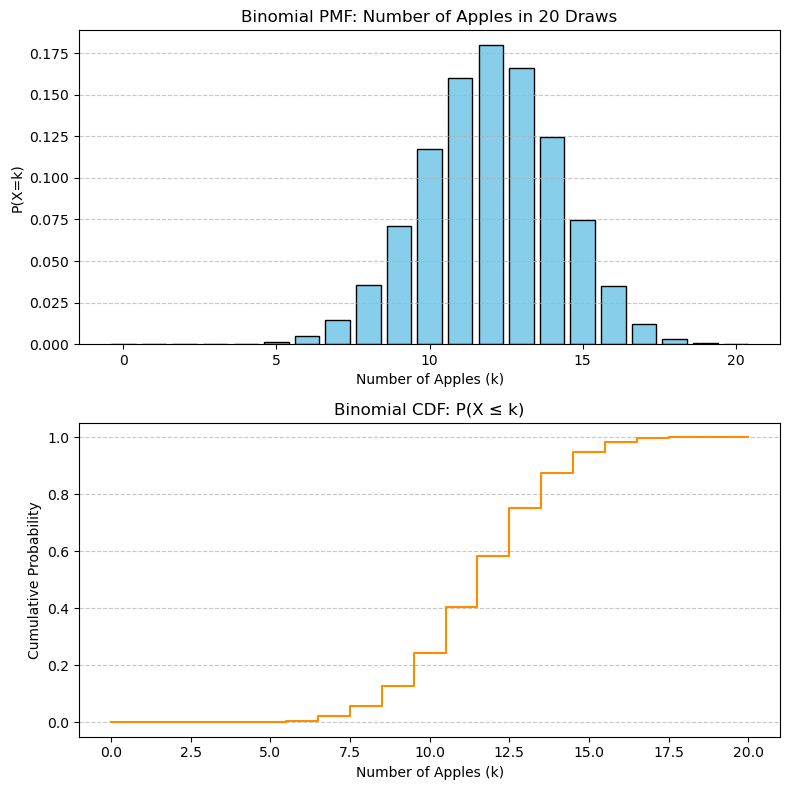

In [42]:
from scipy.stats import binom
#It has built-in PMF/CDF

n=20
p=0.6

k=range(0,21)

pmf=binom.pmf(k, n, p)
cdf=binom.cdf(k, n, p)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# --- PMF ---
ax[0].bar(k, pmf, color='skyblue', edgecolor='black')
ax[0].set_title("Binomial PMF: Number of Apples in 20 Draws")
ax[0].set_xlabel("Number of Apples (k)")
ax[0].set_ylabel("P(X=k)")
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- CDF ---
ax[1].step(k, cdf, where='mid', color='darkorange')
ax[1].set_title("Binomial CDF: P(X ≤ k)")
ax[1].set_xlabel("Number of Apples (k)")
ax[1].set_ylabel("Cumulative Probability")
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [45]:
from scipy.stats import poisson

In [48]:
lambda_rate=2.3
k=5

prob_k_event=poisson.pmf(k, lambda_rate)

print("The probability of the event:", prob_k_event)

The probability of the event: 0.053775025581946814


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

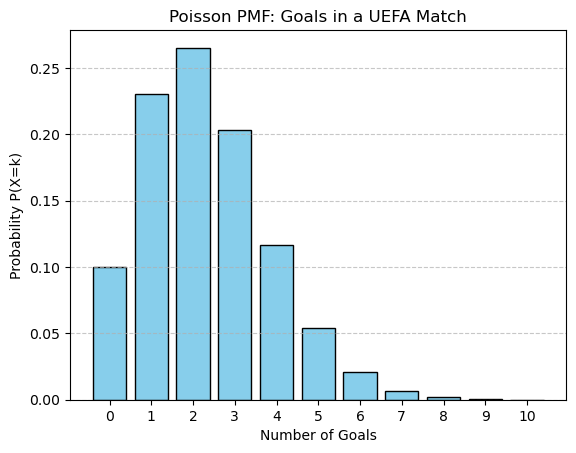

In [50]:
# your code here
# Please label the axes and give a title to the plot 
k=range(0,11)
pmf_values=poisson.pmf(k, lambda_rate)

plt.bar(k, pmf_values, color='skyblue', edgecolor='black')
plt.title("Poisson PMF: Goals in a UEFA Match")
plt.xlabel("Number of Goals")
plt.ylabel("Probability P(X=k)")
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

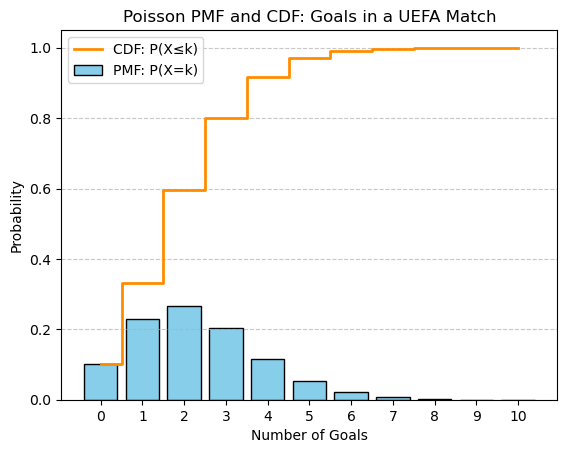

In [51]:
#PMF vs CDF

# PMF and CDF values
pmf_values = poisson.pmf(k, lambda_rate)
cdf_values = poisson.cdf(k, lambda_rate)

# Plot PMF (bars)
plt.bar(k, pmf_values, color='skyblue', edgecolor='black', label='PMF: P(X=k)')

# Plot CDF (line)
plt.step(k, cdf_values, where='mid', color='darkorange', linewidth=2, label='CDF: P(X≤k)')

# Labels and title
plt.title("Poisson PMF and CDF: Goals in a UEFA Match")
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

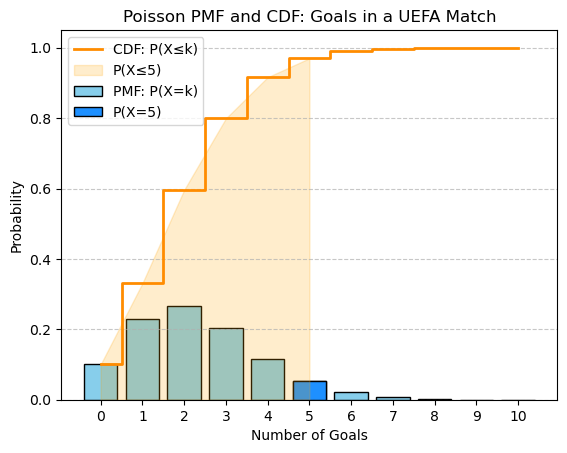

In [52]:
#both the probability of exactly 5 goals (PMF) and the cumulative probability up to 5 goals (CDF)

# Plot PMF (bars)
plt.bar(k, pmf_values, color='skyblue', edgecolor='black', label='PMF: P(X=k)')

# Highlight the probability of exactly 5 goals
plt.bar(5, pmf_values[5], color='dodgerblue', edgecolor='black', label='P(X=5)')

# Plot CDF (step line)
plt.step(k, cdf_values, where='mid', color='darkorange', linewidth=2, label='CDF: P(X≤k)')

# Highlight P(X ≤ 5)
plt.fill_between(k[:6], 0, cdf_values[:6], color='orange', alpha=0.2, label='P(X≤5)')

# Labels, title, legend
plt.title("Poisson PMF and CDF: Goals in a UEFA Match")
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()